In [328]:
import pandas as pd #modules
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import pathlib
from pathlib import Path
from datetime import datetime

In [329]:
import os

def find_reports_in_onedrive():
    """
    Scans the subfolders under the current user's OneDrive folder (including variations like 'OneDrive - Company Name')
    and returns the paths of all folders with the prefix 'reports'.

    Returns:
        list: A list of full paths to folders starting with 'reports', or an empty list if none are found.
    """
    # Get the base path to the user's home directory
    user_home = os.path.expanduser("~")

    # Find the OneDrive folder (handles variations like "OneDrive - Company Name")
    onedrive_folder = None
    for folder in os.listdir(user_home):
        if folder.startswith("OneDrive -"):
            onedrive_folder = os.path.join(user_home, folder)
            break

    if not onedrive_folder:
        raise FileNotFoundError("OneDrive folder not found for the current user.")

    # Search for folders with the prefix 'reports' in the OneDrive directory
    report_folders = []
    for root, dirs, files in os.walk(onedrive_folder):
        for dir_name in dirs:
            if dir_name.lower().startswith("reports"):
                report_folders.append(os.path.join(root, dir_name))

    return report_folders

In [330]:
reports_paths=find_reports_in_onedrive()
reports_paths

['C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_control_variables_refinacion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_cuchillas',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_eventos',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_humidity_measures',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_ops_pendings',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_pre-usos_diligenciamiento_no_cumple',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_quality_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_refination_deviations',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion',
 'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\control_room\\reports_causa_rechazos']

In [331]:
str_folder_searcher="reports_visualizacion_data_produccion"
for report_path in reports_paths:
    if str_folder_searcher in report_path:
        path=Path(reports_paths[reports_paths.index(report_path)])
path=Path.joinpath(path,r"source_and_return_data")
path

WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data')

In [332]:
os.chdir(path) #change working directory to respective reports folder
os.getcwd()

'C:\\Users\\jdbustamante\\OneDrive - Duratex SA\\reports_visualizacion_data_produccion\\source_and_return_data'

In [333]:
directory = Path.joinpath(path,"data_plots") #get current work directory
directory.mkdir(exist_ok=True)
matching_files = list(directory.glob("*obj*.xlsx"))  # Busca archivos que contengan 'obj' y tengan extensión .xlsx
print("Archivos encontrados:", matching_files)

Archivos encontrados: [WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_aperturas_nariz.xlsx'), WindowsPath('C:/Users/jdbustamante/OneDrive - Duratex SA/reports_visualizacion_data_produccion/source_and_return_data/data_plots/test_obj_causa_rechazos.xlsx')]


In [334]:
dict_data_pointer={} #dict to store files as dfs
for i in matching_files: # Read the Excel file 
    file_path = str(i)  # Update this with the path
    df = pd.read_excel(file_path)
    print(file_path)
    df_name=file_path.split("obj_")[1].split(".")[0] #split str with "obj_" and the  "." char and take the file name
    date_col="Fecha" #default col name with dates
    if "aperturas" in file_path.lower(): #if excel name file contains "aperturas", change col name with dates
        date_col="Fecha Paro"
    row_numbers_nan = df.index[df[date_col].isna()].tolist() # Get the row numbers where 'Fecha' or 'Fecha Paro' is NaN
    row_numbers = list(set(row_numbers_nan)) # lists of row with nan numbers
    filtered_df = df.drop(index=row_numbers) # Filter the DataFrame to keep only the rows that are not in row_numbers
    dict_data_pointer[f"{df_name}"]=filtered_df #store filtered df in dictionary data pointer
print(list(dict_data_pointer.keys())) #see keys on dictionary to check callability

C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_aperturas_nariz.xlsx
C:\Users\jdbustamante\OneDrive - Duratex SA\reports_visualizacion_data_produccion\source_and_return_data\data_plots\test_obj_causa_rechazos.xlsx
['aperturas_nariz', 'causa_rechazos']


In [335]:
df_root=dict_data_pointer['aperturas_nariz']
df_root[df_root["Fecha Paro"]=="NaT"]

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1


In [336]:
df_root

,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
0,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,21:00:00,05:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480.0,3,NaN,NaN
1,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,05:00:00,13:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480.0,1,NaN,NaN
2,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-01,13:00:00,21:00:00,ALTO NIVEL DE INVENTARIO - PGR,ALTO NIVEL DE INVENTARIO - PGR,Paro programado de planta,480.0,2,NaN,NaN
3,CRUDO,500 - PRENSA,PARO PROGRAMADO,2025-01-02,21:00:00,19:46:00,500 PRENSA DIEFFENBACHER,MTTO GENERAL - PGR,Arranque de línea de crudo. Se corrigen condic...,406.0,3,11 TAPAS,152426
4,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-02,20:02:00,20:09:00,400 FORMACION Y PREPRENSA,VARIACION HUMEDAD - PRO,Se abrea nariz y se evacúa la fibra,6.0,3,11 TAPAS,152426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PARO PROGRAMADO,2025-01-28,13:00:00,15:10:00,400 FORMACION Y PREPRENSA,CAMBIO DE CALIBRE - PCP,Se recibe turno con la linea detenida por desv...,117.0,3,15 RH,153164
258,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PCP,2025-01-29,05:17:00,05:26:00,400 FORMACION Y PREPRENSA,CAMBIO DE CALIBRE - PCP,Cambio de calibre de 15 mm a 18 mm,9.0,2,18 RH,153167
259,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PCP,2025-01-29,09:17:00,09:27:00,400 FORMACION Y PREPRENSA,CAMBIO DE CALIBRE - PCP,Cambio de calibre de 15 mm a 18 mm,10.0,2,15 RH,153478
260,CRUDO,800 - CLASIFICACION DE FIBRA,PRODUCCIÓN,2025-01-29,15:28:00,17:17:00,800.851 TORNILLO EXTRACTOR POLVO SIERRA DIAGONAL,ATASCO MATERIAL - PRO,corta la prensa por subcion de la sierra diago...,109.0,3,15 RH,153478


In [337]:
df_pro=df_root[df_root["Tipo Paro"].str.contains("PRODUCCIÓN")]
#df_pro.set_index([pd.Index(range(len(df_pro)))],inplace=True)
df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #
df_pro['Fecha Paro']

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_23976\1638482938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro["Fecha Paro"]=df_pro.loc[:,"Fecha Paro"].apply(lambda x: x.strftime("%Y-%m-%d")) #


4      2025-01-02
5      2025-01-02
6      2025-01-02
7      2025-01-03
8      2025-01-03
          ...    
240    2025-01-26
241    2025-01-26
250    2025-01-27
253    2025-01-28
260    2025-01-29
Name: Fecha Paro, Length: 133, dtype: object

# Drop duplicate apertures

In [338]:
dates_ar=[date for date in df_pro["Fecha Paro"].unique()]
dates_ar

['2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-10',
 '2025-01-11',
 '2025-01-12',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-18',
 '2025-01-19',
 '2025-01-20',
 '2025-01-21',
 '2025-01-22',
 '2025-01-26',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29']

In [339]:
list_dropped_idx_rows=[]
for date_ar in dates_ar:
    print(date_ar)
    df_seeker=df_pro.loc[df_pro["Fecha Paro"]==date_ar] #filter by date
    rows_df_seeker=df_seeker.index #get idx of df for current date
    last_row=rows_df_seeker[-1] #to avoid out of range
    print(last_row)
    for idx,row in enumerate(rows_df_seeker):
        print(f"{row} from {len(rows_df_seeker)}")
        if row==last_row:
            continue #jump to next date
        if df_seeker.at[row,"Hora Final"]==df_seeker.at[rows_df_seeker[idx+1],"Hora Inicial"]:
            list_dropped_idx_rows.append(row+1) #add idx to be dropped
    print("idxs to drop are {}".format(list_dropped_idx_rows))
df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date
df_pro

2025-01-02
6
4 from 3
5 from 3
6 from 3
idxs to drop are [5]
2025-01-03
20
7 from 8
8 from 8
9 from 8
10 from 8
11 from 8
12 from 8
16 from 8
20 from 8
idxs to drop are [5, 12]
2025-01-04
23
22 from 2
23 from 2
idxs to drop are [5, 12]
2025-01-05
28
25 from 4
26 from 4
27 from 4
28 from 4
idxs to drop are [5, 12]
2025-01-06
38
30 from 7
32 from 7
34 from 7
35 from 7
36 from 7
37 from 7
38 from 7
idxs to drop are [5, 12, 35]
2025-01-07
57
42 from 14
43 from 14
44 from 14
45 from 14
46 from 14
49 from 14
50 from 14
51 from 14
52 from 14
53 from 14
54 from 14
55 from 14
56 from 14
57 from 14
idxs to drop are [5, 12, 35, 44, 50, 51, 56]
2025-01-08
64
58 from 5
61 from 5
62 from 5
63 from 5
64 from 5
idxs to drop are [5, 12, 35, 44, 50, 51, 56, 62]
2025-01-10
86
68 from 7
69 from 7
75 from 7
76 from 7
80 from 7
81 from 7
86 from 7
idxs to drop are [5, 12, 35, 44, 50, 51, 56, 62]
2025-01-11
99
87 from 11
88 from 11
91 from 11
92 from 11
93 from 11
94 from 11
95 from 11
96 from 11
97 from 11


C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_23976\3455869565.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pro.drop(list_dropped_idx_rows,inplace=True) #drop selected rows for current date


,Linea,Proceso,Tipo Paro,Fecha Paro,Hora Inicial,Hora Final,Descripción Equipo,Modo de Fallo,Obversación,Tiempo Parada,Turno,Calibre,Columna1
4,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-02,20:02:00,20:09:00,400 FORMACION Y PREPRENSA,VARIACION HUMEDAD - PRO,Se abrea nariz y se evacúa la fibra,6.0,3,11 TAPAS,152426
6,CRUDO,"600 - CORTE, ENFRIAMIENTO & APILADO",PRODUCCIÓN,2025-01-02,20:15:00,20:31:00,600.631 SIERRA DIAGONAL,TABLERO EXPLOTADO - PRO,Se pierdesecuencia en la sierra diagonal debid...,16.0,3,11 TAPAS,152426
7,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:05:00,21:16:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,Sensor de cadena lado de operación de la cadena,11.0,1,9,152433
8,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:18:00,21:19:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,Evacuación del tablero,1.0,1,9,152433
9,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-03,21:20:00,21:42:00,500 PRENSA DIEFFENBACHER,SENSOR OBSTRUIDO - PRO,"Evacuación del tablero, limpieza de sensor de ...",22.0,1,9,152433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-26,04:03:00,04:08:00,500 PRENSA DIEFFENBACHER,TABLERO EXPLOTADO - PRO,Evento de explotadas. Se abre nariz para evacu...,5.0,1,"5,5 RH",153158
241,CRUDO,500 - PRENSA,PRODUCCIÓN,2025-01-26,04:14:00,04:20:00,500 PRENSA DIEFFENBACHER,TABLERO EXPLOTADO - PRO,Evento de explotadas. Se abre nariz para evacu...,6.0,1,"5,5 RH",153158
250,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-27,13:07:00,14:02:00,400 FORMACION Y PREPRENSA,AJUSTE PARAMETROS - PRO,se evidencia mala formacion en el colchon por ...,54.0,3,15 RH,153163
253,CRUDO,"400 - FORMACION, PRE-PRENSADO & CORTE",PRODUCCIÓN,2025-01-28,10:34:00,10:35:00,400.412 DETECTOR DE METALES BANDA DE FORMACION,DETECCIÓN DE METAL - PRO,se presenta metal en la banda 415,1.0,2,4 RH,153155


In [340]:
df_count_fail_mode_equipment=df_pro.groupby(by=["Fecha Paro","Modo de Fallo","Descripción Equipo"]).count().loc[:,"Linea"]
df_count_fail_mode_equipment

Fecha Paro  Modo de Fallo                          Descripción Equipo                              
2025-01-02  TABLERO EXPLOTADO - PRO                600.631 SIERRA DIAGONAL                             1
            VARIACION HUMEDAD - PRO                400 FORMACION Y PREPRENSA                           1
2025-01-03  DETECCIÓN DE METAL - PRO               110.111 DETECTOR DE METALES ANTES DEL REFINO        1
                                                   400.412 DETECTOR DE METALES BANDA DE FORMACION      1
            SENSOR OBSTRUIDO - PRO                 500 PRENSA DIEFFENBACHER                            3
                                                                                                      ..
2025-01-26  ACCIONAMIENTO SISTEMA SEGURIDAD - PRO  500 PRENSA DIEFFENBACHER                            3
            TABLERO EXPLOTADO - PRO                500 PRENSA DIEFFENBACHER                            2
2025-01-27  AJUSTE PARAMETROS - PRO                400 FORMA

In [341]:
multi_index_from_df=list(df_count_fail_mode_equipment.index)
multi_index_from_df

[('2025-01-02', 'TABLERO EXPLOTADO - PRO', '600.631 SIERRA DIAGONAL'),
 ('2025-01-02', 'VARIACION HUMEDAD - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-01-03',
  'DETECCIÓN DE METAL - PRO',
  '110.111 DETECTOR DE METALES ANTES DEL REFINO'),
 ('2025-01-03',
  'DETECCIÓN DE METAL - PRO',
  '400.412 DETECTOR DE METALES BANDA DE FORMACION'),
 ('2025-01-03', 'SENSOR OBSTRUIDO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-03',
  'VARIACION HUMEDAD - PRO',
  '300 SECADO PRIMERA Y SEGUNDA ETAPA'),
 ('2025-01-04', 'LIMPIEZA FILTRO - PRO', '250.268 BOMBA DOSIFICACION DE AGUA'),
 ('2025-01-04', 'SENSOR OBSTRUIDO - PRO', '600.616 CARRO DE TRANSFERENCIA'),
 ('2025-01-05', 'SENSOR OBSTRUIDO - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06',
  'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
  '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06', 'AJUSTE PARAMETROS - PRO', '500 PRENSA DIEFFENBACHER'),
 ('2025-01-06', 'DETECCIÓN DE METAL - PRO', '400 FORMACION Y PREPRENSA'),
 ('2025-01-06', 'DETECCIÓN DE METAL - P

In [342]:
dates=sorted(list(set([multi_index[0] for multi_index in multi_index_from_df ])))
dates

['2025-01-02',
 '2025-01-03',
 '2025-01-04',
 '2025-01-05',
 '2025-01-06',
 '2025-01-07',
 '2025-01-08',
 '2025-01-10',
 '2025-01-11',
 '2025-01-12',
 '2025-01-13',
 '2025-01-14',
 '2025-01-15',
 '2025-01-18',
 '2025-01-19',
 '2025-01-20',
 '2025-01-21',
 '2025-01-22',
 '2025-01-26',
 '2025-01-27',
 '2025-01-28',
 '2025-01-29']

In [343]:
fail_modes=sorted(list(set([multi_index[1] for multi_index in multi_index_from_df ])))
fail_modes

['ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
 'AJUSTE DE POSICION - PRO',
 'AJUSTE PARAMETROS - PRO',
 'ALARMA VIBRACIÓN - PRO',
 'ATASCO MATERIAL - PRO',
 'DETECCIÓN DE METAL - PRO',
 'FALTA DE MATERIA PRIMA - PRO',
 'LIMPIEZA DE EQUIPOS - PRO',
 'LIMPIEZA FILTRO - PRO',
 'PERDIDA DE SECUENCIA - ELC',
 'SENSOR OBSTRUIDO - PRO',
 'TABLERO EXPLOTADO - PRO',
 'VARIACION FLUJO - PRO',
 'VARIACION HUMEDAD - PRO',
 'VARIACION NIVEL - PRO',
 'VARIACION TEMPERATURA - PRO']

In [344]:
equipments=sorted(list(set([multi_index[2] for multi_index in multi_index_from_df ])))
equipments

['100.118 ELEVADOR DE CANGILONES',
 '110.111 DETECTOR DE METALES ANTES DEL REFINO',
 '200.226LX01 SENSOR DE NIVEL MAX-MAX 226LX01',
 '200.227 TORNILLO ESTRUJADOR',
 '200.232 REFINADOR',
 '200.232.GS14 SENSOR POSICION DE DISCOS',
 '250.268 BOMBA DOSIFICACION DE AGUA',
 '300 SECADO PRIMERA Y SEGUNDA ETAPA',
 '400 FORMACION Y PREPRENSA',
 '400.402.00 BUNKER DE FORMACION',
 '400.403.05 DESMENUZADOR #5 BUNKER',
 '400.406 SCALPER (RASURADOR)',
 '400.412 DETECTOR DE METALES BANDA DE FORMACION',
 '400.415 BANDA DE FORMACION',
 '500 PRENSA DIEFFENBACHER',
 '500.522 SISTEMA DE LIMPIEZA PRENSA',
 '600.607 ESTRELLA DE ENFRIAMIENTO',
 '600.610 STACKER',
 '600.614 APILADOR DE CALIBRES BAJOS (STACKING)',
 '600.616 CARRO DE TRANSFERENCIA',
 '600.631 SIERRA DIAGONAL',
 '800.809 SIFTER',
 '800.851 TORNILLO EXTRACTOR POLVO SIERRA DIAGONAL',
 '856.01 PLC VYNCKE',
 'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO',
 'FALTA DE MATERIA PRIMA - PRO',
 'PERDIDA DE SECUENCIA - ELC',
 'VARIACION NIVEL - PRO']

In [345]:
df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)
df_stacked_data

C:\Users\jdbustamante\AppData\Local\Temp\ipykernel_23976\558380705.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_stacked_data=pd.DataFrame(data=[],index=dates,columns=fail_modes).fillna(0)


,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE DE POSICION - PRO,AJUSTE PARAMETROS - PRO,ALARMA VIBRACIÓN - PRO,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - PRO,FALTA DE MATERIA PRIMA - PRO,LIMPIEZA DE EQUIPOS - PRO,LIMPIEZA FILTRO - PRO,PERDIDA DE SECUENCIA - ELC,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO,VARIACION NIVEL - PRO,VARIACION TEMPERATURA - PRO
2025-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-01-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [346]:
acronyms=lambda x:"\n"+''.join(w[0] for w in x.split("- PRO")[0].split() if w[0].isupper())
dict_stacked_values={fail_mode:[""]*len(dates) for fail_mode in fail_modes}
for date,fail_mode,equip in multi_index_from_df:
    print(date,fail_mode)
    count_by_date_by_fail_mode_by_equipment= df_count_fail_mode_equipment[date,fail_mode].sum() # df_count_fail_mode_equipment.at[date,fail_mode,equip]
    print(count_by_date_by_fail_mode_by_equipment)
    value_label_plus_equip=str(count_by_date_by_fail_mode_by_equipment)+f" {acronyms(fail_mode)}" # equip.split(" ")[0]+":"+
    print("valor mas equipo: ",value_label_plus_equip)
    df_stacked_data.loc[date,fail_mode]=count_by_date_by_fail_mode_by_equipment
    idx_date=dates.index(date)
    dict_stacked_values[fail_mode][idx_date]=value_label_plus_equip
    dict_stacked_values[fail_mode][idx_date]
dict_stacked_values

2025-01-02 TABLERO EXPLOTADO - PRO
1
valor mas equipo:  1 
TE
2025-01-02 VARIACION HUMEDAD - PRO
1
valor mas equipo:  1 
VH
2025-01-03 DETECCIÓN DE METAL - PRO
2
valor mas equipo:  2 
DDM
2025-01-03 DETECCIÓN DE METAL - PRO
2
valor mas equipo:  2 
DDM
2025-01-03 SENSOR OBSTRUIDO - PRO
3
valor mas equipo:  3 
SO
2025-01-03 VARIACION HUMEDAD - PRO
2
valor mas equipo:  2 
VH
2025-01-04 LIMPIEZA FILTRO - PRO
1
valor mas equipo:  1 
LF
2025-01-04 SENSOR OBSTRUIDO - PRO
1
valor mas equipo:  1 
SO
2025-01-05 SENSOR OBSTRUIDO - PRO
4
valor mas equipo:  4 
SO
2025-01-06 ACCIONAMIENTO SISTEMA SEGURIDAD - PRO
2
valor mas equipo:  2 
ASS
2025-01-06 AJUSTE PARAMETROS - PRO
1
valor mas equipo:  1 
AP
2025-01-06 DETECCIÓN DE METAL - PRO
3
valor mas equipo:  3 
DDM
2025-01-06 DETECCIÓN DE METAL - PRO
3
valor mas equipo:  3 
DDM
2025-01-07 AJUSTE PARAMETROS - PRO
1
valor mas equipo:  1 
AP
2025-01-07 ATASCO MATERIAL - PRO
8
valor mas equipo:  8 
AM
2025-01-07 ATASCO MATERIAL - PRO
8
valor mas equipo:  

{'ACCIONAMIENTO SISTEMA SEGURIDAD - PRO': ['',
  '',
  '',
  '',
  '2 \nASS',
  '',
  '',
  '',
  '',
  '1 \nASS',
  '2 \nASS',
  '',
  '',
  '',
  '',
  '',
  '2 \nASS',
  '',
  '3 \nASS',
  '',
  '',
  ''],
 'AJUSTE DE POSICION - PRO': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '1 \nADP',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'AJUSTE PARAMETROS - PRO': ['',
  '',
  '',
  '',
  '1 \nAP',
  '1 \nAP',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '4 \nAP',
  '2 \nAP',
  '3 \nAP',
  '',
  '1 \nAP',
  '',
  ''],
 'ALARMA VIBRACIÓN - PRO': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '3 \nAV',
  '4 \nAV',
  '1 \nAV',
  '',
  '',
  '',
  '',
  ''],
 'ATASCO MATERIAL - PRO': ['',
  '',
  '',
  '',
  '',
  '8 \nAM',
  '2 \nAM',
  '1 \nAM',
  '',
  '1 \nAM',
  '',
  '1 \nAM',
  '',
  '1 \nAM',
  '1 \nAM',
  '2 \nAM',
  '1 \nAM',
  '',
  '',
  '',
  '',
  '1 \nAM'],
 'DETECCIÓN DE METAL - PRO': [''

In [347]:
df_stacked_data

,ACCIONAMIENTO SISTEMA SEGURIDAD - PRO,AJUSTE DE POSICION - PRO,AJUSTE PARAMETROS - PRO,ALARMA VIBRACIÓN - PRO,ATASCO MATERIAL - PRO,DETECCIÓN DE METAL - PRO,FALTA DE MATERIA PRIMA - PRO,LIMPIEZA DE EQUIPOS - PRO,LIMPIEZA FILTRO - PRO,PERDIDA DE SECUENCIA - ELC,SENSOR OBSTRUIDO - PRO,TABLERO EXPLOTADO - PRO,VARIACION FLUJO - PRO,VARIACION HUMEDAD - PRO,VARIACION NIVEL - PRO,VARIACION TEMPERATURA - PRO
2025-01-02,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2025-01-03,0,0,0,0,0,2,0,0,0,0,3,0,0,2,0,0
2025-01-04,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2025-01-05,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
2025-01-06,2,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0
2025-01-07,0,0,1,0,8,0,0,0,0,0,0,0,1,0,0,0
2025-01-08,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0
2025-01-10,0,1,0,0,1,0,0,0,0,0,0,5,0,0,0,0
2025-01-11,0,0,0,0,0,4,0,0,0,0,2,3,0,0,0,1
2025-01-12,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [348]:
list_count_by_fail_mode_per_date=list(df_stacked_data.T.values)
weight_counts={" ".join(fail_mode.split("-")[0].split()).lower()+" acronimo: "+acronyms(fail_mode.upper()):list_count_by_fail_mode_per_date[idx] for idx,fail_mode in enumerate(fail_modes)}
weight_counts

{'accionamiento sistema seguridad acronimo: \nASS': array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0]),
 'ajuste de posicion acronimo: \nADP': array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'ajuste parametros acronimo: \nAP': array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 3, 0, 1, 0, 0]),
 'alarma vibración acronimo: \nAV': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 1, 0, 0, 0, 0, 0]),
 'atasco material acronimo: \nAM': array([0, 0, 0, 0, 0, 8, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1]),
 'detección de metal acronimo: \nDDM': array([0, 2, 0, 0, 3, 0, 1, 0, 4, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 1, 0]),
 'falta de materia prima acronimo: \nFDMP': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'limpieza de equipos acronimo: \nLDE': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'limpieza filtro acronimo: \nLF': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [349]:
for new_key,old_key in zip(weight_counts.keys(),fail_modes):
    dict_stacked_values[new_key] = dict_stacked_values.pop(old_key)
dict_stacked_values

{'accionamiento sistema seguridad acronimo: \nASS': ['',
  '',
  '',
  '',
  '2 \nASS',
  '',
  '',
  '',
  '',
  '1 \nASS',
  '2 \nASS',
  '',
  '',
  '',
  '',
  '',
  '2 \nASS',
  '',
  '3 \nASS',
  '',
  '',
  ''],
 'ajuste de posicion acronimo: \nADP': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '1 \nADP',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 'ajuste parametros acronimo: \nAP': ['',
  '',
  '',
  '',
  '1 \nAP',
  '1 \nAP',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '4 \nAP',
  '2 \nAP',
  '3 \nAP',
  '',
  '1 \nAP',
  '',
  ''],
 'alarma vibración acronimo: \nAV': ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '3 \nAV',
  '4 \nAV',
  '1 \nAV',
  '',
  '',
  '',
  '',
  ''],
 'atasco material acronimo: \nAM': ['',
  '',
  '',
  '',
  '',
  '8 \nAM',
  '2 \nAM',
  '1 \nAM',
  '',
  '1 \nAM',
  '',
  '1 \nAM',
  '',
  '1 \nAM',
  '1 \nAM',
  '2 \nAM',
  '1 \nAM',
  '',
  '',
  '',
  ''

# Plot

In [350]:
colors_available=mcolors.TABLEAU_COLORS
colors_available

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [351]:
"""
colors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}
colors_choosen
"""

'\ncolors_choosen={color: colors_available[color] for color in list(colors_available)[:len(weight_count_causes)]}\ncolors_choosen\n'

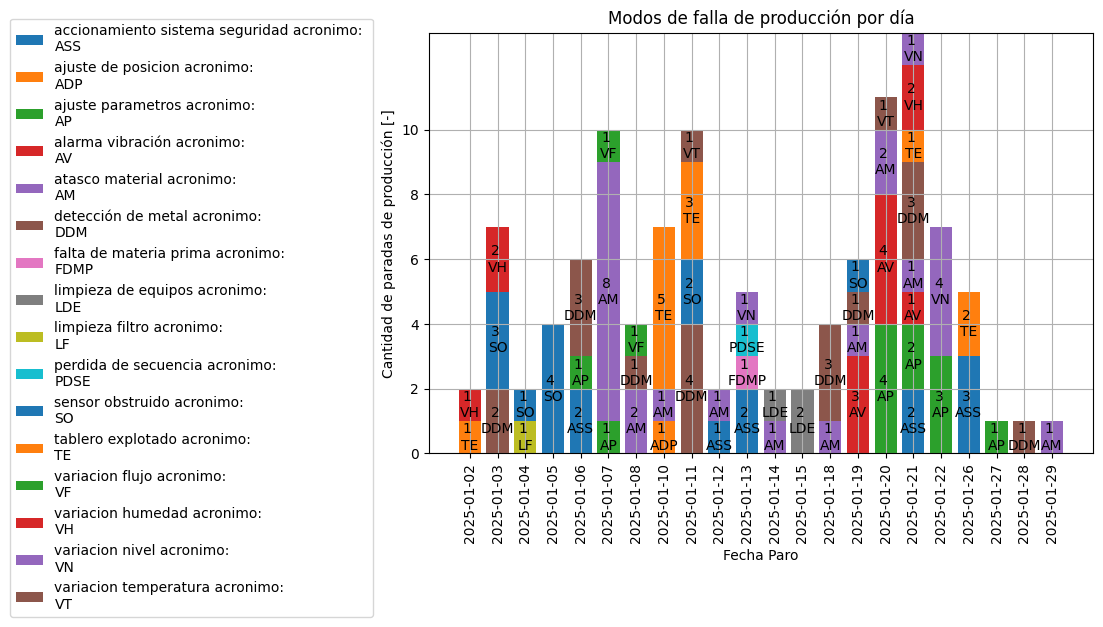

In [360]:
fig, ax = plt.subplots()
fig.tight_layout()  # Adjust layout to prevent clipping of labels
#fig.set_figheight(8)
fig.set_figwidth(7.5)
#fig.set_size_inches(50, 40) #set plot size
#plot aperturas
amt_dates=len(dates)
bottom = np.zeros(amt_dates) #initial axis for stacked bars plotting
plt.grid() #make grid mesh
max_bottom=0 #to store max of bottoms in construction of bar
for (data_label,weight_count),bar_value_stick in zip(weight_counts.items(),dict_stacked_values.values()): # ,colors_choosen run through dates, rejected per cause per dates, labels of values of rejected per cause per day 
    p = ax.bar(dates, weight_count,label=data_label,bottom=bottom) # ,color=color_cause take bar plot elements: rectangle(attribute 1, attribute 2, ...)
    bottom += weight_count #make new start to plot next top rectangle
    check_bottom=np.max(bottom)
    if check_bottom>max_bottom:
        max_bottom=check_bottom #to generate ylim of causas rechazos
    ax.bar_label(p,labels=bar_value_stick,label_type='center',color="black") #   add bar height str value on bar center
leq=ax.legend(bbox_to_anchor=(-0.64,1.05),loc="upper left") #generate legend box for bar plot
ax.set_xticks(amt_xticks)
ax.set_xticklabels(dates,rotation=90) #rotate x axis labels 90º to be displayed vertically
ax.set_xlabel("Fecha Paro") #name of bar plot x axis
amt_stops_per_fail_mode=np.array(list(weight_counts.values()))
max_y_axis=np.max(amt_stops_per_fail_mode) #get max of all data
ax.set_yticks(np.arange(0, max_y_axis*(1.40), 2)) #set y axis label values: axis pitch=10 unds
ax.set_ylabel("Cantidad de paradas de producción [-]") #y axis name for bar plot
ax.set_aspect('auto')
imgs_folder="/imgs_reports_daily" #str with name to save plots
imgs_type_folder="/fail_modes_equipments"
imgs_year_folder=f"/year_{dates[0].split("-")[0]}"
imgs_month_folder=f"/month_{dates[0].split("-")[1]}"
img_name="/fail_modes_PRO_per_Type" #name of img file
str_today=datetime.today().strftime('%Y-%m-%d') #asign date of generation
plt.title("Modos de falla de producción por día") #make title
directory_to_save = Path(str(directory)+imgs_folder+imgs_type_folder+imgs_year_folder+imgs_month_folder) # get directory to save plot
directory_to_save.mkdir(exist_ok=True)
plt.savefig(str(directory_to_save)+img_name+dates[0]+"_"+dates[-1]+"_"+str_today+".png", bbox_inches='tight') #store img plot
plt.show()